<a href="https://colab.research.google.com/github/snghynn/summ/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_ch3_1~3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 딥러닝 텐서플로 ch3.1 ~ 3



pg. 50 ~ 86 필사

# Ch3. 케라스(Keras)
# 3.1 딥러닝 준비
## 1-1 주요 용어
### 1-1-1 하이퍼파라미터(hyper-parameter)
- 하이퍼파라미터: 딥러닝뿐만 아니라 머신러닝 모델을 훈련할 때 사용자가 직접 설정해주는 설정값
-  학습속도나 반복 훈련 횟수 등 사용자가 직접 설정해야 하는 값들이 많은데, 이를 하이퍼파라미터라고 함
- 사용자 지정값에 따라 모델 성능 및 결과가 달라짐
- 하이퍼파라미터 튜닝: 모델의 예측 성능을 높이기 위해 하이퍼파라미터 값들을 조절하는 행위

### 1-1-2 과소적합 vs 과대적합(underfitting vs overfitting)
- 훈련용 데이터(train set): 머신르닝 모델이 학습할 데이터
- 예측용 데이터(test set): 정답 레이블이 없는 머신러닝 모델이 예측해야 하는 대상 데이터

- 머신러닝에서 훈련 데이터에서 패턴 학습을 통해 모델 완성해 나감
- 과소적합: 모델이 충분히 학습되지 않은 경우 예측 성능 떨어짐
- 과대적합: 과소적합과 다르게 학습 데이터를 지나치게 반복 학습해 과하게 적합된 상태. 훈련 데이터에 존재하는 불필요한 노이즈까지 모델에 반영되어 예측 데이터에 대한 예측 오차 발생할 확률이 커짐

- 훈련 데이터를 잘 구성하는 것이 중요 : 과소적합/과대적합 최소화 & 정확도 최대로
  - 예측 데이터와 분포 동일하게 구성
  - 불필요한 노이즈는 데이터 분석 및 전처리를 통해 해소
  - 훈련 데이터의 일부를 검증 데이터로 활용하여 검증 성능이 가장 좋은 구간을 모델의 가장 이상적으로 학습된 지점이라 판단하는 방법으로 최종 모델 결정


### 1-1-3 에포크(epoch)
- 에포크(epoch): 딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프를 1 epoch이라 함
- 훈련 데이터셋을 빠짐없이 모두 1번 모델 훈련에 사용하면 1 epoch 훈련 과정을 마치고 다음 epoch으로 넘어감

### 1-1-4 손실함수(loss function)
- 손실함수: 예측 값과 정답 값의 차이 또는 오차
- 오차: 딥러닝 모델의 출력 값과 실제 값과의 차이
- 분류나 회귀 모델에 따라 손실함수 다르게 적용
- 지도 학습의 분류
  - 이진분류: binary_crossentropy/sigmoid
  - 다중분류: categorical_crossentropy/softmax
- 회귀: MSE, MAE, Huber 등

< 손실함수 목록 >

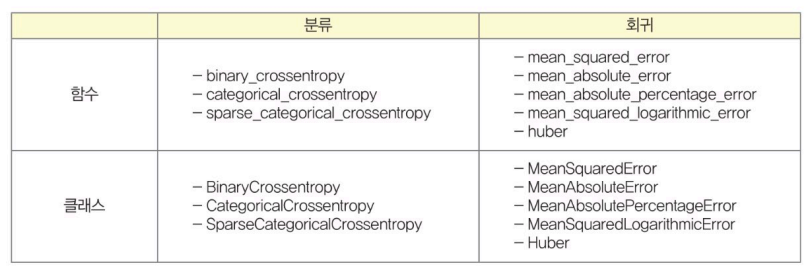


### 1-1-5 경사하강법(gradient descent)
- 경사하강법: 딥러닝 모델을 훈련할 때, 모델 내부의 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 최소 함수 값을 갖도록 하는 방법

< 경사하강법 >


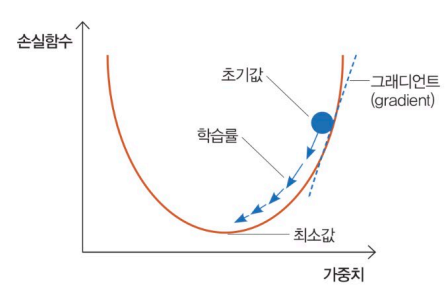


- 손실함수(Loss function) 혹은 목적합수를 다음과 같이 정의:

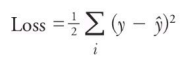

  - 1/2 : 가중치에 대한 그래디언트(gradient)를 계산하기 쉽도록 추가된 상수 값

- 단순 선형회귀 수식이 주어졌을 때, 손실함수를 최소로 하는 w와 b를 구하는 과정을 경사하강법으로 구현

y = wx + b
  - 샘플 데이터셋을 생성하는 함수를 정의
  - 임의의 w와 b 값을 지정해 주어진 x에 대한 y 값을 생성
  - y 생성 시 약간의 노이즈도 추가
  

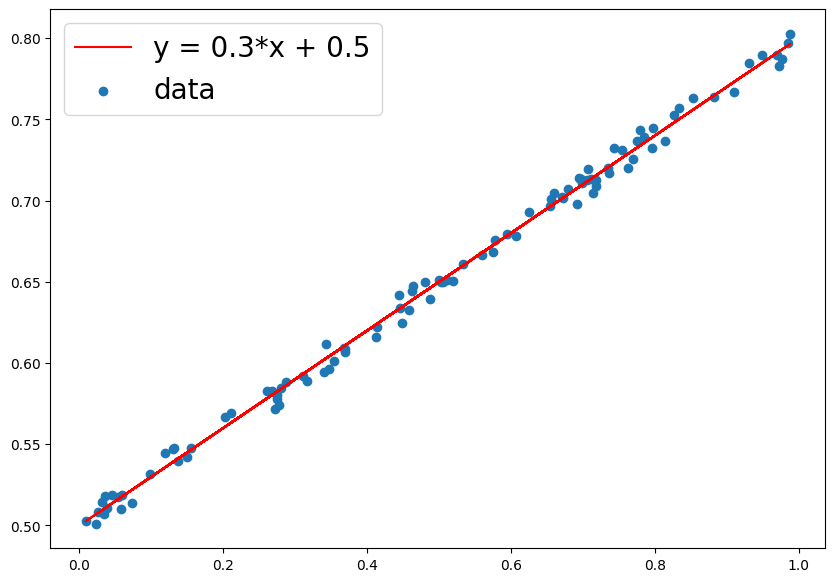

w:0.3,b:0.5


In [49]:
## 경사 하강법을 넘파이로 구현
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5,b=0.8, size=50, noise=1.0):
  x = np.random.rand(size)
  y = w * x + b
  noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
  yy = y + noise
  plt.figure(figsize=(10,7))
  plt.plot(x,y,color='r',label=f'y = {w}*x + {b}')
  plt.scatter(x,yy,label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w:{w},b:{b}')
  return x,yy

x,y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

> 실제 생성된 y 데이터는 y = 0.3x + 0.5 식과 완벽히 일치하지 않고 약간의 노이즈가 추가됨

- w,b에 대한 그래디언트 구하는 부분 구현
  - 그래디언트는 손실함수를 w,b에 대한 각각의 편미분 값을 구한 뒤 학습률 계수를 곱하여 이전의 w,b로부터 차감
  

In [50]:
## 넘파이로 최적화하는 과정 구현
# 최대 반복횟수를 지정하고 오차가 0.005 이내로 수렴하면 반복문 종료

# 최대 반복 횟수
num_epoch = 1000

# 학습률(learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w,b를 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
  # Hypothesis 정의
  y_hat = w * x + b

  # 반복문 안에서 손실함수 정의
  error = 0.5*((y_hat-y)**2).sum()
  if error < 0.005:
    break
  # Gradient 미분 계산: 매 epoch마다 w,b에 대한 가중치 업데이트
  w = w - learning_rate * ((y_hat-y)*x).sum()
  b = b - learning_rate * (y_hat-y).sum()

  errors.append(error)

  if epoch % 5 == 0:
    print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch,w,b,error))

print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch,w,b,error))

 0 w = 0.68437, b = 0.33281 error = 1.07621
 5 w = 0.61431, b = 0.33372 error = 0.42993
10 w = 0.56735, b = 0.35836 error = 0.31157
15 w = 0.52749, b = 0.37949 error = 0.22592
20 w = 0.49357, b = 0.39747 error = 0.16392
25 w = 0.46472, b = 0.41276 error = 0.11905
30 w = 0.44017, b = 0.42577 error = 0.08657
35 w = 0.41929, b = 0.43684 error = 0.06306
40 w = 0.40152, b = 0.44625 error = 0.04604
45 w = 0.38640, b = 0.45427 error = 0.03372
50 w = 0.37354, b = 0.46108 error = 0.02481
55 w = 0.36260, b = 0.46688 error = 0.01835
60 w = 0.35329, b = 0.47182 error = 0.01368
65 w = 0.34537, b = 0.47601 error = 0.01030
70 w = 0.33863, b = 0.47958 error = 0.00785
75 w = 0.33290, b = 0.48262 error = 0.00608
------------------------------------------------------------
80 w = 0.3, b = 0.5 error = 0.00480


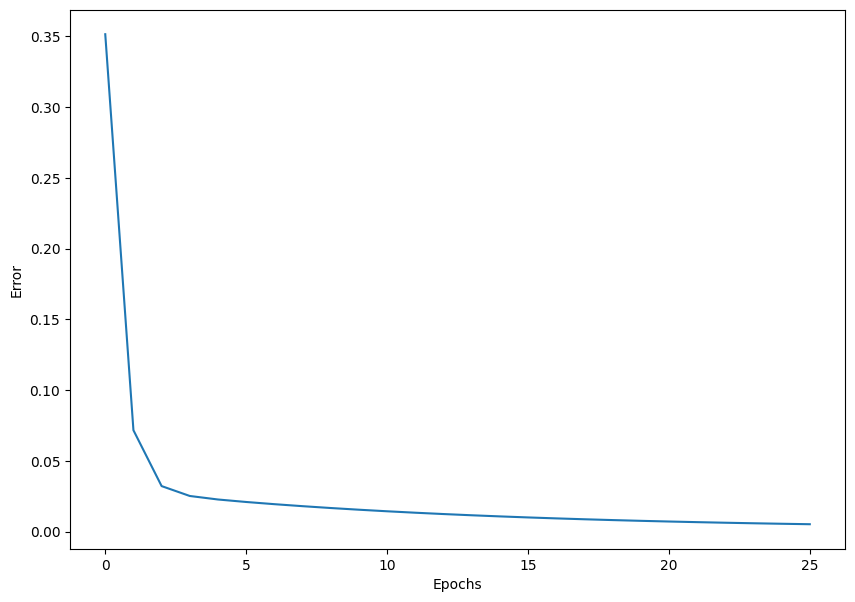

In [4]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

>- 가중치가 난수 값에 의하여 다르게 초기화됨 -> 매번 실행 할때마다 수렴하는 속도 차이가 있음
- 결국 목표하는 오차 범위 안으로 수렴하여 반복문 종료
- 종료 후 w,b 계수 확인하면 샘플 데이터셋을 생성할때 설정한 w,b 계수와 비슷한 값임

## 1-2 딥러닝 프로세스
< 딥러닝 모델 구축 및 훈련 프로세스 >

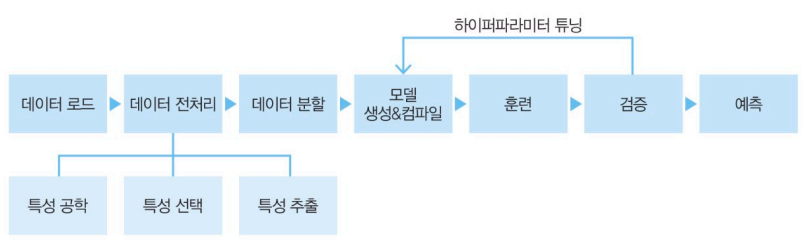

### 1-2-1 데이터 전처리
- 데이터를 모델에 주입하기 전에 데이터를 가공하는 단계
- 배열의 차원을 변경하거나 스케일을 조정할 수 있음
- 전처리 단계에서 데이터셋의 형태나 차원을 미리 구상해야 다음 단계에서 모델을 설계할 때 입력 데이터셋의 형태를 올바르게 정의할 수 있음


### 1-2-2 모델 생성
- 모델의 구조를 정의하고 생성하는 단계
- Sequential API: 순차적인 구조의 모델
- Functional API, Model Subclassing: 다중 입력 및 출력을 가지고 복잡한 구조를 갖는 모델

### 1-2-3 모델 컴파일
- 생성된 모델 훈련에 사용할 손실함수(loss), 옵티마이저(optimizer), 평가지표(metrics) 등을 정의
- compile() 메소드를 적용하고, 앞에서 열거한 여러가지 속성 값을 설정

### 1-2-4 모델 훈련
- 모델을 훈련하는 단계
- fit() 함수에 모델 훈련에 필요한 정보를 매개변수로 전달
- 훈련 데이터셋, 검증 데이터셋, epoch, 배치 크기 및 콜백 함수 등을 지정

### 1-2-5 모델 검증
- 훈련이 완료된 모델을 검증하는 단계
- 모델 훈련 시 사용하지 않은 검증 데이터셋을 모델에 입력하고 모델의 예측 값을 정답과 비교하여 평가지표 계산
- 반환된 검증 결과를 토대로 잠재적인 모델의 성능 평가가 이루어짐
- 검증 결과를 바탕으로 모델 수정, 컴파일 및 훈련 과정을 거쳐 재평가

### 1-2-6 모델 예측
- 훈련과 검증이 완료된 모델로 테스트셋에 대하여 모델이 예측하고 그 결과를 반환




# 3.2 단순 신경망 훈련
## 2-1 선형 회귀
- 회귀 분석: 하나 이상의 독립변수들이 종속변수에 미치는 영향을 추정하는 통계기법
- 단순선형회귀 모형: 하나의 X가 Y에 미치는 영향을 추정
- 1차 함수 관계로 나타낼 수 있음 : y = ax + b

## 2-2 뉴런(Neuron)
- 뉴런: 인공 신경망 모델을 구성하는 하나의 신경
- 뉴런은 노드(node)라고도 불림
- 신경망은 여러 개의 레이어(layer)를 가지며 1개의 레이어는 1개 이상의 뉴런으로 구성
- 뉴런의 내부에서 가중치 존재, 모델 훈련해 오차 역전파(모델 파라미터들에 대한 그래디언트를 계산하는 방법) 통해 뉴런의 가중치 업데이트
- 역전파: 신경망을 구성하는 그래디언트를 출력층에서 입력층 순으로 역으로 계산하고 저장


## 2-3 Dense 레이어
- Dense 레이어: 심층 신경망 모델을 구성하는 가장 기본 레이어
- 각 레이어와 레이어 사이에 모든 뉴런이 서로 연결되어 있기 때문에, 완전 연결층이라고 부르기도 함


< 4개의 Dense 레이어로 구성된 모델 : 완전 연결층 >

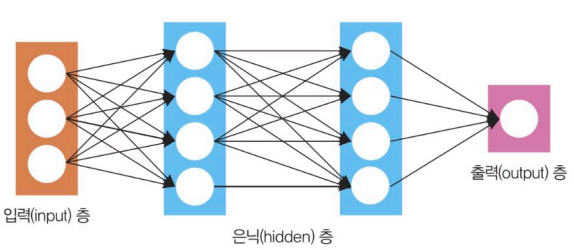

  - 입력 레이어 1개, 은닉 레이어 2개, 출력 레이어 1개로 구성
  - 각 레이어는 1개 이상의 뉴런으로 구성: 입력 레이어에는 뉴런 3개, 출력 레이어는 1개 뉴런
  - 완전 연결층: 모든 뉴런들의 정보(텐서)의 흐름을 나타내는 화살표로 연결됨



In [5]:
## Dense 레이어를 구성하는 노드 개수와 활성화 함수 지정
import tensorflow as tf

# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

# ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

## 2-4 데이터셋 만들기
- 단순선형회귀 모형을 지도학습 방식으로 훈련하기 위해 x,y 데이터 생성

In [6]:
## 케라스를 활용해 단순선형회귀 모델을 만들고 딥러닝 학습
# 샘플 데이터셋 생성
x = np.arange(1,6) # 5개의 순차적인 x 데이터 생성

# y = 3x + 2
y = 3*x + 2  # x를 y에 대입하여 y 데이터 5개 생성
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


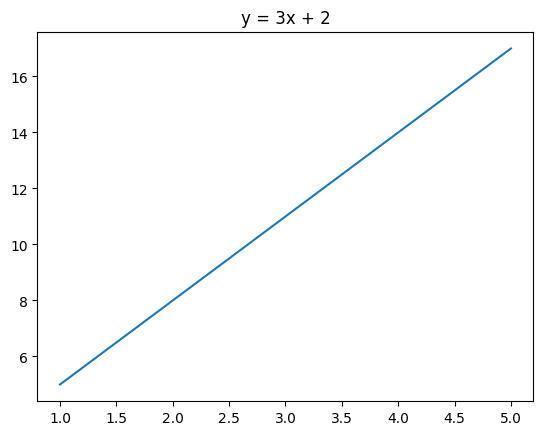

In [7]:
import matplotlib.pyplot as plt

# 생성한 데이터를 시각화
plt.plot(x,y)
plt.title('y = 3x + 2')
plt.show()

> 기울기 3을 갖는 직선 그래프

## 2-5 Sequential API
- 층을 이어붙이듯이 시퀀스에 맞게 일렬로 연결하는 방식 -> 입력 레이어부터 출력 레이어까지 순서를 가짐
- Sequential ApI 사용 시 간결하게 딥러닝 모델을 만들 수 있음
- 입력 데이터는 시퀀스의 가장 앞층에 투입되고, 순서대로 각 층을 하나씩 통과하면서 딥러닝 연산 수행

< Sequential API >

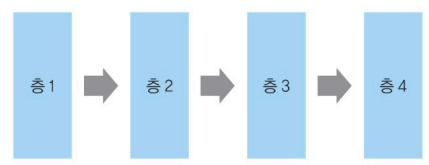

- 단점: 2개 이상의 다중 입력이나 다중 출력을 갖는 복잡한 구조를 만들 수 없음 -> 이경우 Functional API 사용


### 2-5-1 모델 구조
- Sequential API 사용하여 모델 생성시 다음과 같은 두 가지 방법으로 모델 구성할 수 있음

1. 리스트형 정의: Sequential 클래스 함수에 파이썬 리스트 형태로 여러 개의 층 입력 -> [] 안에 쉼표로 구분하여 층을 쌓음

In [8]:
import tensorflow as tf
# 1. 리스트형
model = tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(5),
        tf.keras.layers.Dense(1)
])

2. add 함수로 레이어 추가: add() 사용해 1개의 층 추가. 여러 개의 층 추가하려면 add 함수를 반복해서 여러번 사용해야 함

In [9]:
# 2. add 함수 사용해 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

### 2-5-2 입력 데이터 형태
- Sequential API 사용해 모델 구성 시 첫번째 층은 input_shape 매개변수를 지정해야 함

ex) 데이터셋의 shape이 (150,4)로 구성:

- input shape은 (4,) 혹은 [4]로 지정 가능
- 150개 샘플에 대하여 4개의 입력 변수가 존재
- 각 행: 샘플 데이터, 열: 입력 변수

In [10]:
import tensorflow as tf

model = tf.keras.Sequential([
  # 입력 데이터의 shape=(150,4)인 경우 input_shape 지정
  tf.keras.layers.Dense(10, input_shape=[4]),
  tf.keras.layers.Dense(5),
  tf.keras.layers.Dense(1)
])

### 2-5-3 단순선형회귀 모델 정의
- 단순 선형회귀 모델은 1개의 뉴런을 가지는 Dense 레이어 한개를 사용
- 여기에 정의한 1개의 뉴런은 기울기에 해당하는 w와 상수항에 해당하는 b를 매개변수로 가짐
- input_shape = [1]: y = wx + b에서는 x값을 나타내는 입력 변수 1개만 존재
- use_bias = True
  - bias true가 기본 설정되어 상수항 b가 추가됨
  - use_bias = False : 상수항 b를 포함하지 않게 됨

In [11]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
])

## 2-6 모델 요약
- model.summary() 사용
- 모델의 구조 확인 가능
- 층별 노드의 개수 표시
- 요약 하단에는 훈련 시 업데이트할 파라미터의 개수가 표기됨
- Total params: 모델 내부에 존재하는 모든 파라미터의 합계
- Trainable params: 모델 훈련 시 업데이트할 파라미터의 총 개수
- Non-trainable params: 훈련 시 업데이트하지 않을 파라미터의 총 개수
- 총 파라미터 수: 가중치 w와 편향 b 두개



In [12]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



## 2-7 컴파일
- 모델의 훈련 과정에서 적용할 옵티마이저(optimizer), 손실함수(loss), 평가지표(metrics) 정의
- 지정 방법: 클래스 인스턴스, 함수, 사전 정의된 문자열

- 클래스 인스턴스
  - 학습률(learning rate), 모멘텀(momentum)  등의 하이퍼파라미터를 사용자가 직접 지정 가능
  - 문자열로 지정하는 경우 기본값으로 설정된 하이퍼파라미터 사용하고, 하이퍼파라미터 수정이 어렵다는 한계가 있음

In [13]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])

In [14]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [15]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()
              ])

In [16]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

## 2-8 훈련
- fit(): 데이터를 입력하여 모델 훈련
- 모델을 훈련한다의 의미: 가중치(weight) 텐서를 업데이트하는 과정
- 메소드
  - 훈련용 데이터셋의 입력(x)과 정답에 해당하는 출력(y)
  - 반복 훈련할 epoch 수 지정
    - 매 epoch 끝날 때마다 훈련 데이터셋에 대한 손실과 평가지표 출력
    - verbose = 0: 중간 과정 출력 X
  - validation_data 옵션 지정했다면 검증 셋에 대한 손실과 평가지표도 함께 출력

In [17]:
# epoch=5: 5회 반복 훈련 후 결과 확인
model.fit(x,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 453ms/step - loss: 292.8349 - mae: 15.8232
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 170.6834 - mae: 12.1056
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 99.4994 - mae: 9.2676
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 58.0166 - mae: 7.1010
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 33.8423 - mae: 5.4470


>- 5 epcoh 훈련이 끝난 뒤 손실함수는 33.8423, mae는 5.4470
- 모델의 예측 오차가 점점 줄어듦(모델이 잘 학습되고 있다)
- 반복 훈련 횟수가 충분하지 않아 학습이 덜 됨(과소적합): epoch을 늘려서 추가 학습



In [51]:
# 단순 선형회귀 모델 인스턴스 새로 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련: epoch=1200 지정해 충분히 훈련할 수 있도록
history = model.fit(x, y, epochs=1200)

Epoch 1/1200
4/4 [==============================] - 0s 4ms/step - loss: 1.6167 - mae: 1.2026
Epoch 2/1200
4/4 [==============================] - 0s 3ms/step - loss: 1.3369 - mae: 1.0847
Epoch 3/1200
4/4 [==============================] - 0s 4ms/step - loss: 1.0964 - mae: 0.9741
Epoch 4/1200
4/4 [==============================] - 0s 3ms/step - loss: 0.8870 - mae: 0.8673
Epoch 5/1200
4/4 [==============================] - 0s 3ms/step - loss: 0.7216 - mae: 0.7706
Epoch 6/1200
4/4 [==============================] - 0s 3ms/step - loss: 0.6088 - mae: 0.6974
Epoch 7/1200
4/4 [==============================] - 0s 3ms/step - loss: 0.5089 - mae: 0.6283
Epoch 8/1200
4/4 [==============================] - 0s 3ms/step - loss: 0.4256 - mae: 0.5629
Epoch 9/1200
4/4 [==============================] - 0s 3ms/step - loss: 0.3600 - mae: 0.5100
Epoch 10/1200
4/4 [==============================] - 0s 3ms/step - loss: 0.3082 - mae: 0.4685
Epoch 11/1200
4/4 [==============================] - 0s 3ms/step - lo

> - 충분한 epoch동안 훈련 후 mse, mae 모두 개선됨

< history 변수 사용하여 epoch별 훈련 손실 및 평가지표 시각화 >

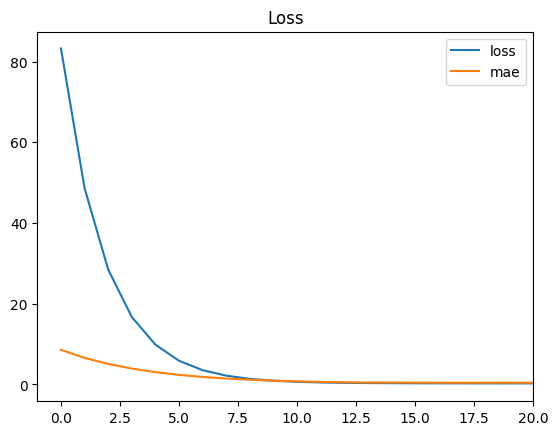

In [19]:
import matplotlib.pyplot as plt

# 20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['mae'],label='mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show()

> - 첫 10 epoch까지 손실이 급격히 감소
- 10 epoch을 넘어가면 감소 폭이 둔화되면서 조금씩 감소함
: 모델이 훈련 초기 단계에서는 학습이 매우 빠른 속도로 진행되다가 일정 epoch 이후에는 학습 속도가 느려지는 패턴을 보임


## 2-9 검증
- evaluate(): 모델의 성능 검증

In [52]:
model.evaluate(x,y)

4/4 [==============================] - 0s 4ms/step - loss: 2.9115e-05 - mae: 0.0045


[2.9115280995029025e-05, 0.004522605333477259]

>- 모델 훈련 단계에서 1200번 epoch을 종료한 상태에서 출력된 값과 동일
- 검증 단계에서는 모델이 훈련을 마친 상태의 가중치를 그대로 적용하여 손실과 평가지표를 계산하기 때문


- 교차 검증(cross-validation): 별도의 데이터셋을 검증용으로 활용하는 방법
- 홀드아웃, K-Fold 교차검증 등

## 2-10 예측
- predict(): 새로운 입력 데이터를 넣어 주면 모델의 예측 값을 얻을 수 있음


In [21]:
model.predict([10]) # x=10일 때 예측값

1/1 [==============================] - 0s 203ms/step


array([[32.039318]], dtype=float32)

> 정답인 y=32에 꽤 근사한 값이다.



# 3.3 심층 신경망으로 이미지 분류
- 이미지 분류를 위해 단층이 아닌 더 깊은 층을 쌓아 깊이가 있는 딥러닝 모델 생성


## 3-1 케라스 내장 데이터셋 로드
- mnist 손글씨 데이터셋은 훈련 데이터셋과 검증 데이터셋을 구분하여 제공  

In [22]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

In [23]:
# load_data()로 데이터셋 로드
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [24]:
# 로드된 데이터셋 확인
# shape:(데이터셋 크기, 28, 28) -> 28*28 픽셀
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


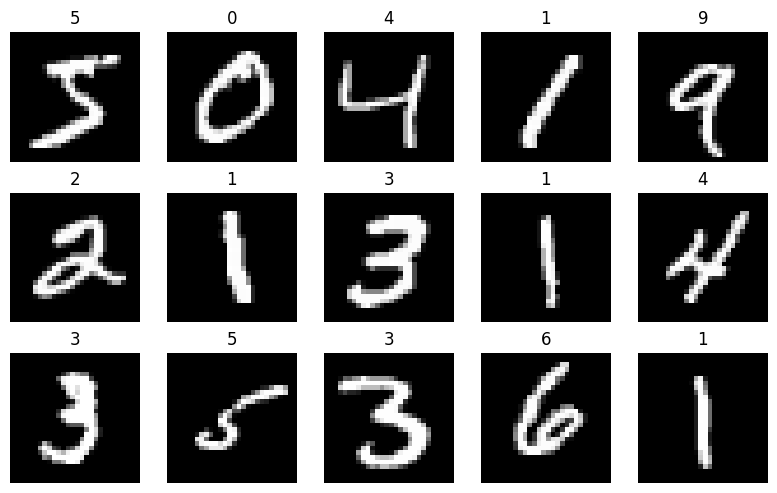

In [25]:
## 처음 15장에 대한 이미지 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
  ax = axes[i//5, i%5]
  # imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

## 3-2 데이터 전처리
- 정규화를 통해 데이터의 범위 조절
- x_train: 넘파이 배열
- 배열의 각 원소는 이미지를 구성하는 하나의 픽셀 값과 일대일 매칭됨

In [26]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [27]:
# 픽셀 값의 최소/최대값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터의 범위를 0~1 사이의 값을 가지도록 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [28]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [29]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

> - 0 ~ 1 사이의 값이 출력됨
- 정규화하는 이유: 입력 데이터가 정규화되어 모델이 학습하는 경우 경사하강법 알고리즘에 의한 수렴 속도가 비정규화된 입력 데이터를 가질 때보다 더 빨리 수렴
- 국소 최적(local minimum)에 빠지는 현상 방지해주는 효과


## 3-3 Flatten 레이어
- 정규화를 하더라도 개별 데이터 값의 범위는 축소되지만, 원본 행렬의 형태는 그대로 유지
- Dense 레이어에는 1차원 배열이 들어가야 함 -> 이미지 데이터를 1차원으로 전처리하여 주입해야 함

In [53]:
print(f'변경 전 shape:{x_train.shape}')
# reshape() 사용하여 이미지 데이터를 1차원으로 전처리
print(f'1D으로 shape 변경 후: {x_train.reshape(60000,-1).shape}')

변경 전 shape:(60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


In [31]:
print(f'변경 전 shape:{x_train.shape}')

# Flatten 레이어 적용해 이미지 데이터를 1차원으로 전처리
print(f'Flatten 적용 후:{tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape:(60000, 28, 28)
Flatten 적용 후:(60000, 784)


## 3-4 활성화 함수
- 비선형 출력으로 변환해주는 함수
- Sigmoid, Hyperbolic Tangent, ReLu, Leaky ReLU 등

In [32]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

In [33]:
# Dense 레이어와 relu 활성호 함수 레이어를 별도 적용한 경우
model = tf.keras.Sequential([
        tf.keras.layers.Dense(128),
        tf.keras.layers.Activation('relu')
])

## 3-5 입력과 출력
- 딥러닝 모델을 만들 때는 input_shape 매개변수를 지정하는 것이 일반적
- 분류 모델의 가장 마지막 레이어는 출력층
- 출력층 노드 개수는 반드시 분류해야 할 클래스의 개수와 동일해야 함
- 모델의 깊이(레이어의 개수)와 너비(각 레이어를 구성하는 노드의 개수)에 대한 정답은 없음
- 최적의 모델을 찾기 위해서는 여러 시도를 통해 최족 모델 형태 찾아야 함

In [34]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        # 노드 = 10개(클래스 개수와 동일) = 마지막 출력층의 노드 개수
        tf.keras.layers.Dense(10, activation='softmax'),
])

In [54]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')
# 이진 분류 모델이더라도 출력 레이어의 클래스를 원핫 인코딩으로 변환하여 노드 개수가 2개인 경우 softmax 사용

## 3-6 손실 함수
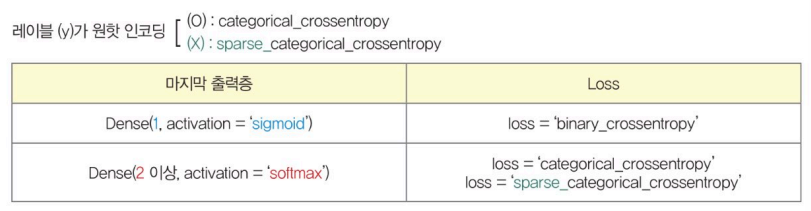

In [36]:
# 이진 분류(출력 노드 개수 = 1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

In [37]:
# y가 원핫 벡터인 경우
# [0.,0.,0.,0.,0.,1.,0.,0.,0.,0.]
model.compile(loss='categorical_crossentropy')
# y가 원핫 벡터가 아닌 경우
model.compile(loss='sparse_categorical_crossentropy')

## 3-7 옵티마이저
- 옵티마이저: 손실을 낮추기 위해서, 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는데 사용되는 최적화 방법
- 일반적으로 많이 사용되는 알고리즘 : Adam


In [38]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

## 3-8 평가지표
- 분류 모델에 대한 평가지표(metrics)
  - accuracy(또는 acc) : 정확도
  - auc, precision, recall
- 모델 컴파일 단계에서 여러 지표를 동시에 출력도 가능

In [39]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [40]:
# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 3-9 훈련
- 모델 훈련 시 검증 셋 추가 지정하면, 매 epoch마다 훈련 손실과 검증 손실, 각 셋에 대한 평가지표를 나란히 출력함

In [41]:
model.fit(x_train, y_train,
          # 검증 셋 지정
          validation_data=(x_test, y_test),
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2323 - accuracy: 0.9317 - val_loss: 0.1121 - val_accuracy: 0.9669
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0950 - accuracy: 0.9709 - val_loss: 0.1025 - val_accuracy: 0.9674
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0668 - accuracy: 0.9784 - val_loss: 0.0827 - val_accuracy: 0.9760
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0492 - accuracy: 0.9846 - val_loss: 0.0744 - val_accuracy: 0.9773
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0395 - accuracy: 0.9872 - val_loss: 0.0716 - val_accuracy: 0.9788
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0338 - accuracy: 0.9886 - val_loss: 0.0877 - val_accuracy: 0.9761
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0282 - accuracy: 0.9908 - val_loss: 0.0883 - val_ac

## 3-10 평가
- 10회의 epoch 끝나고 훈련이 종류된 뒤 evaluate()로 모델 성능 검증, 평가 결과 확인
- evaluate(): 컴파일 단계에서 지정한 손실과 정확도를 순서대로 반환

In [42]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0904 - accuracy: 0.9782
검증 셋 정확도: 0.9782000184059143


## 3-11 예측
- perdict(): 모델의 예측 결과 반환
- 예측에 필요한 새로운 데이터셋이 준비되어 있지 않기 때문에, 검증 데이터셋의 입력 데이터인 x_test 사용

In [43]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [44]:
# 예측 결과 출력
predictions[0]

array([6.6845081e-13, 1.7128348e-13, 1.5120878e-09, 1.8380245e-09,
       2.8662435e-13, 1.4708807e-13, 9.7510369e-16, 9.9999994e-01,
       1.1096345e-11, 1.6838221e-08], dtype=float32)

In [45]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


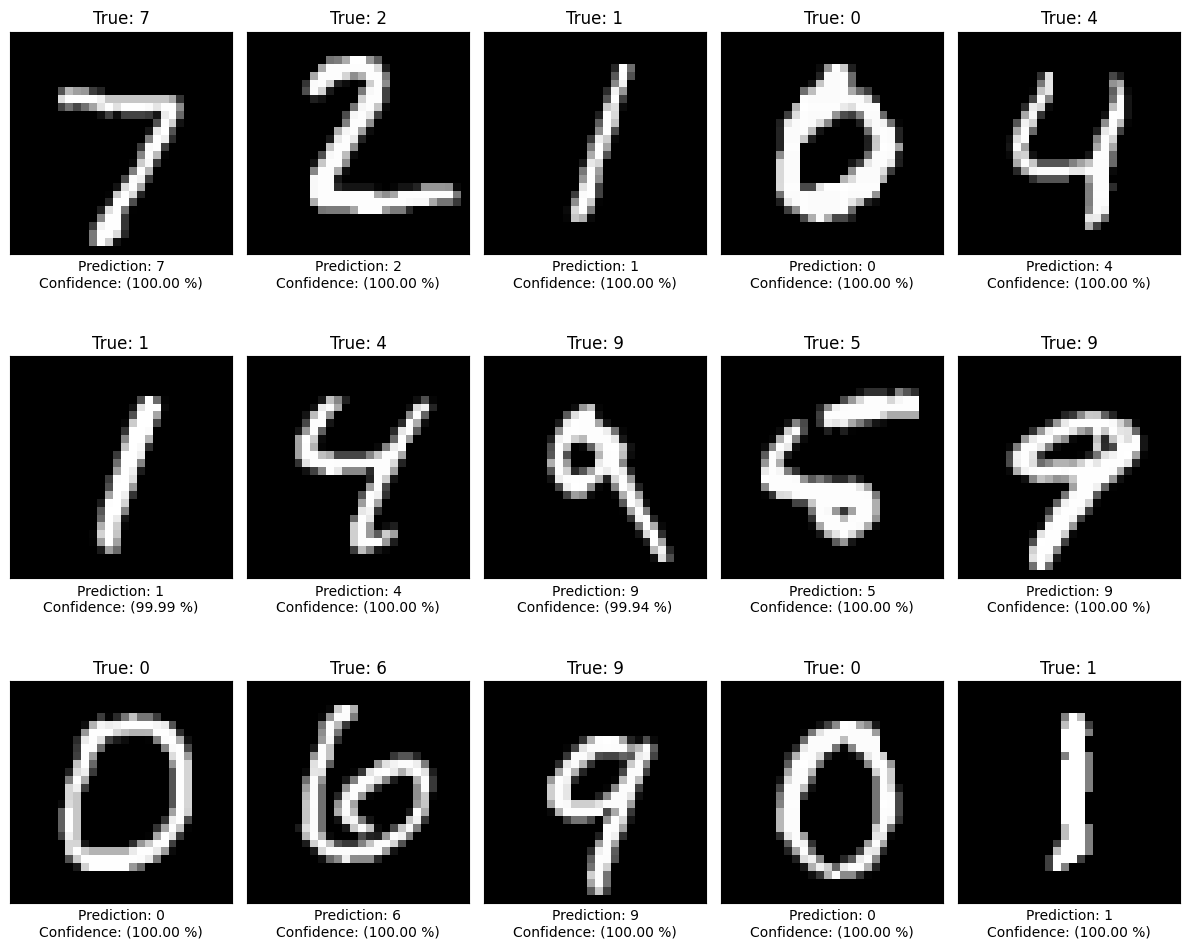

In [46]:
## 데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(12,10)
for i in range(15):
  ax = axes[i//5, i%5]
  img, y_true, y_pred, confidence = get_one_result(i)
  # imshow로 이미지 시각화
  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')
plt.tight_layout()
plt.show()